In [26]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.metrics import r2_score

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
import statsmodels.api as sm

In [7]:
df = pd.read_csv('Housing.csv')

In [8]:
df.shape

(545, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [10]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Missing values

In [11]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

There are no missing values in the dataset

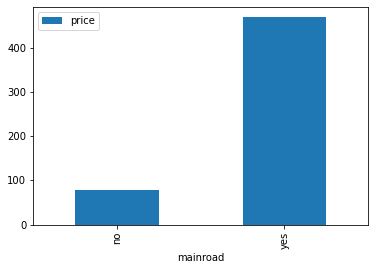

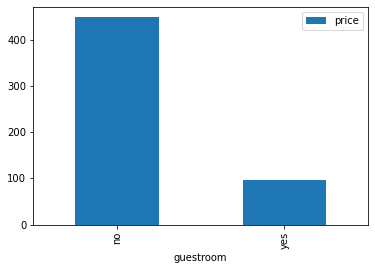

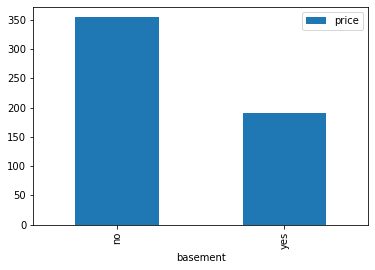

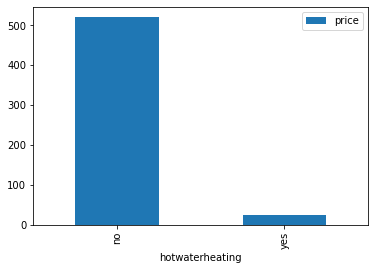

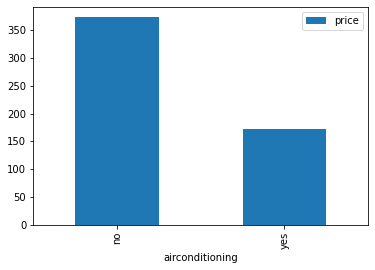

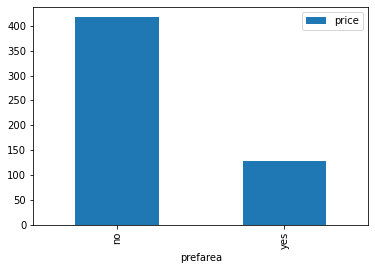

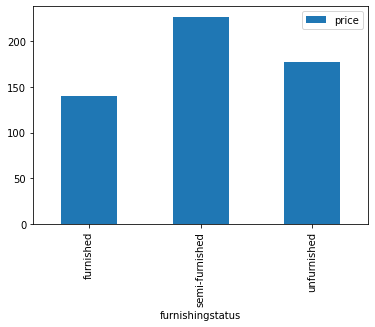

In [12]:
for cols in df.select_dtypes(include='object'):
    groups = df.groupby(cols).count().reset_index()
    groups.plot(kind='bar', x=cols, y='price')
    groups

In [13]:
categorical =  df.select_dtypes(include = ["object"])
numeric = df.select_dtypes(include=['int64'])

# Outlier

In [28]:
numeric.describe(percentiles=[0.01,0.05,0.10,0.25,0.30,0.40,0.50,0.60,0.75,0.85,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,30%,40%,50%,60%,75%,85%,90%,99%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,1870400.0,2450000.0,2835000.0,3430000.0,3605000.0,3990000.0,4340000.0,4830000.0,5740000.0,6615000.0,7350000.0,10542000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,1972.0,2562.0,3000.0,3600.0,3664.0,4065.0,4600.0,5400.0,6360.0,7157.0,7980.0,12543.6,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,5.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0,4.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,3.0,3.0


# Correlation Matrix

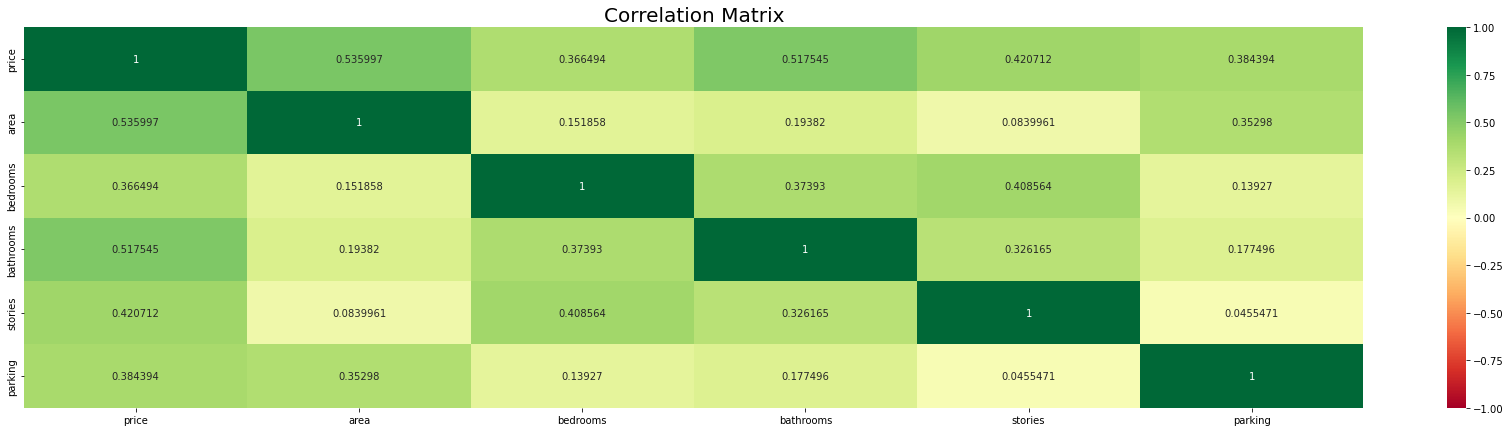

In [14]:
# Correlation Matrix Plotting
plt.figure(figsize=(30,7)) 
plt.title("Correlation Matrix", fontsize=20)
sns.heatmap(numeric.corr(),cmap='RdYlGn',annot=True,vmax=1.0,vmin=-1.0,fmt='g')  
#cmap is the color for heatmap, annot=True is to show the correlation matrix value on heatmap
#vmax and vmin are the threshold for the heatmap and fmt will create a scale
plt.show()

# Label Encoder

In [15]:
from sklearn import preprocessing
  

label_encoder = preprocessing.LabelEncoder()

for cols in categorical:
    # Encode labels in column .
    categorical[cols]= label_encoder.fit_transform(categorical[cols])
    categorical[cols].unique()

In [16]:
categorical.head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,1,0,0,0,1,1,0
1,1,0,0,0,1,0,0
2,1,0,1,0,0,1,1
3,1,0,1,0,1,1,0
4,1,1,1,0,1,0,0


In [17]:
# split into X and y
X = numeric.drop(['price'], axis=1)
y = numeric['price']

In [18]:
X = pd.concat([X, categorical], axis=1)

In [19]:
X.shape

(545, 12)

In [31]:
#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

,VIF,variable
0,8.270130,area
1,16.368165,bedrooms
2,9.408363,bathrooms
3,7.880723,stories
4,1.985880,parking
5,6.852485,mainroad
6,1.472838,guestroom
7,2.013876,basement
8,1.089167,hotwaterheating
9,1.759717,airconditioning


# Test train split

In [20]:
#Train_test split 75:25
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(408, 12)
(137, 12)
(408,)
(137,)


# Linear Regression

In [22]:
lr = LinearRegression()
lr.fit(X_train,y_train)   # Fit a linear model on this data set

LinearRegression()

In [23]:
# model parameters and annova
X_train_final=sm.add_constant(X_train)
model_object=sm.OLS(y_train,X_train_final)
model=model_object.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     74.36
Date:                Thu, 16 Jan 2025   Prob (F-statistic):           2.02e-93
Time:                        11:27:31   Log-Likelihood:                -6220.3
No. Observations:                 408   AIC:                         1.247e+04
Df Residuals:                     395   BIC:                         1.252e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.492e+05   2.86e+05  